In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Factor_processed_DEC_data.csv')

# Display the first few rows and data types
df.head(20)

,Respondent_ID,Choice_Set_ID,Main_Choice,Sub_Option,Rank,Abroad Study?
0,0,Education Quality,A,Moderately priced tuition fees,1,I am already in Abroad
1,0,Education Quality,A,High-quality education,2,I am already in Abroad
2,0,Education Quality,A,Limited availability of scholarships,3,I am already in Abroad
3,0,Career Prospects,B,Abundant availability of part-time job opportu...,1,I am already in Abroad
4,0,Career Prospects,B,Moderate career prospects and job opportunitie...,2,I am already in Abroad
5,0,Career Prospects,B,Lower paygrade,3,I am already in Abroad
6,0,Political Factors,B,Higher living expenses due to economic challenges,1,I am already in Abroad
7,0,Political Factors,B,Limited access to civil liberties and freedom ...,2,I am already in Abroad
8,0,Political Factors,B,Political instability and unrest in the home c...,3,I am already in Abroad
9,0,Social Factors,A,Higher cost of living in socially vibrant urba...,1,I am already in Abroad


In [49]:
df.columns

Index(['Respondent_ID', 'Choice_Set_ID', 'Main_Choice', 'Sub_Option', 'Rank',
       'Abroad Study?'],
      dtype='object')

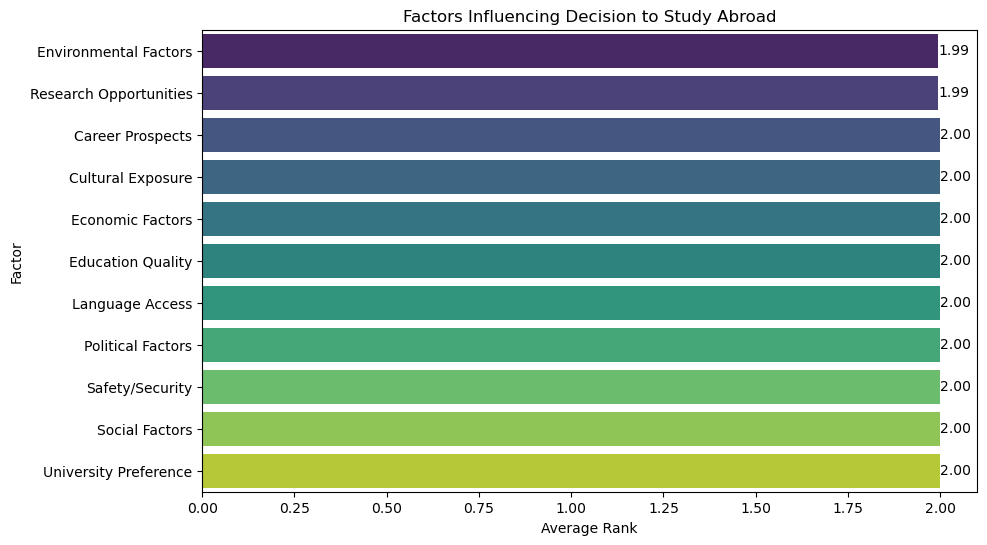

In [50]:
# Filter data to include only those who plan to go abroad or are already abroad
df_abroad = df[df['Abroad Study?'].isin(['Yes', 'I am already in Abroad'])]

# Calculate the mean rank for each Choice_Set_ID
factor_influence = df_abroad.groupby('Choice_Set_ID')['Rank'].mean().reset_index()

# Sort factors by influence (lower rank is better)
factor_influence = factor_influence.sort_values(by='Rank')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=factor_influence, x='Rank', y='Choice_Set_ID', palette='viridis')

# Add factor names on bars
for index, value in enumerate(factor_influence['Rank']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.xlabel('Average Rank')
plt.ylabel('Factor')
plt.title('Factors Influencing Decision to Study Abroad')
plt.show()

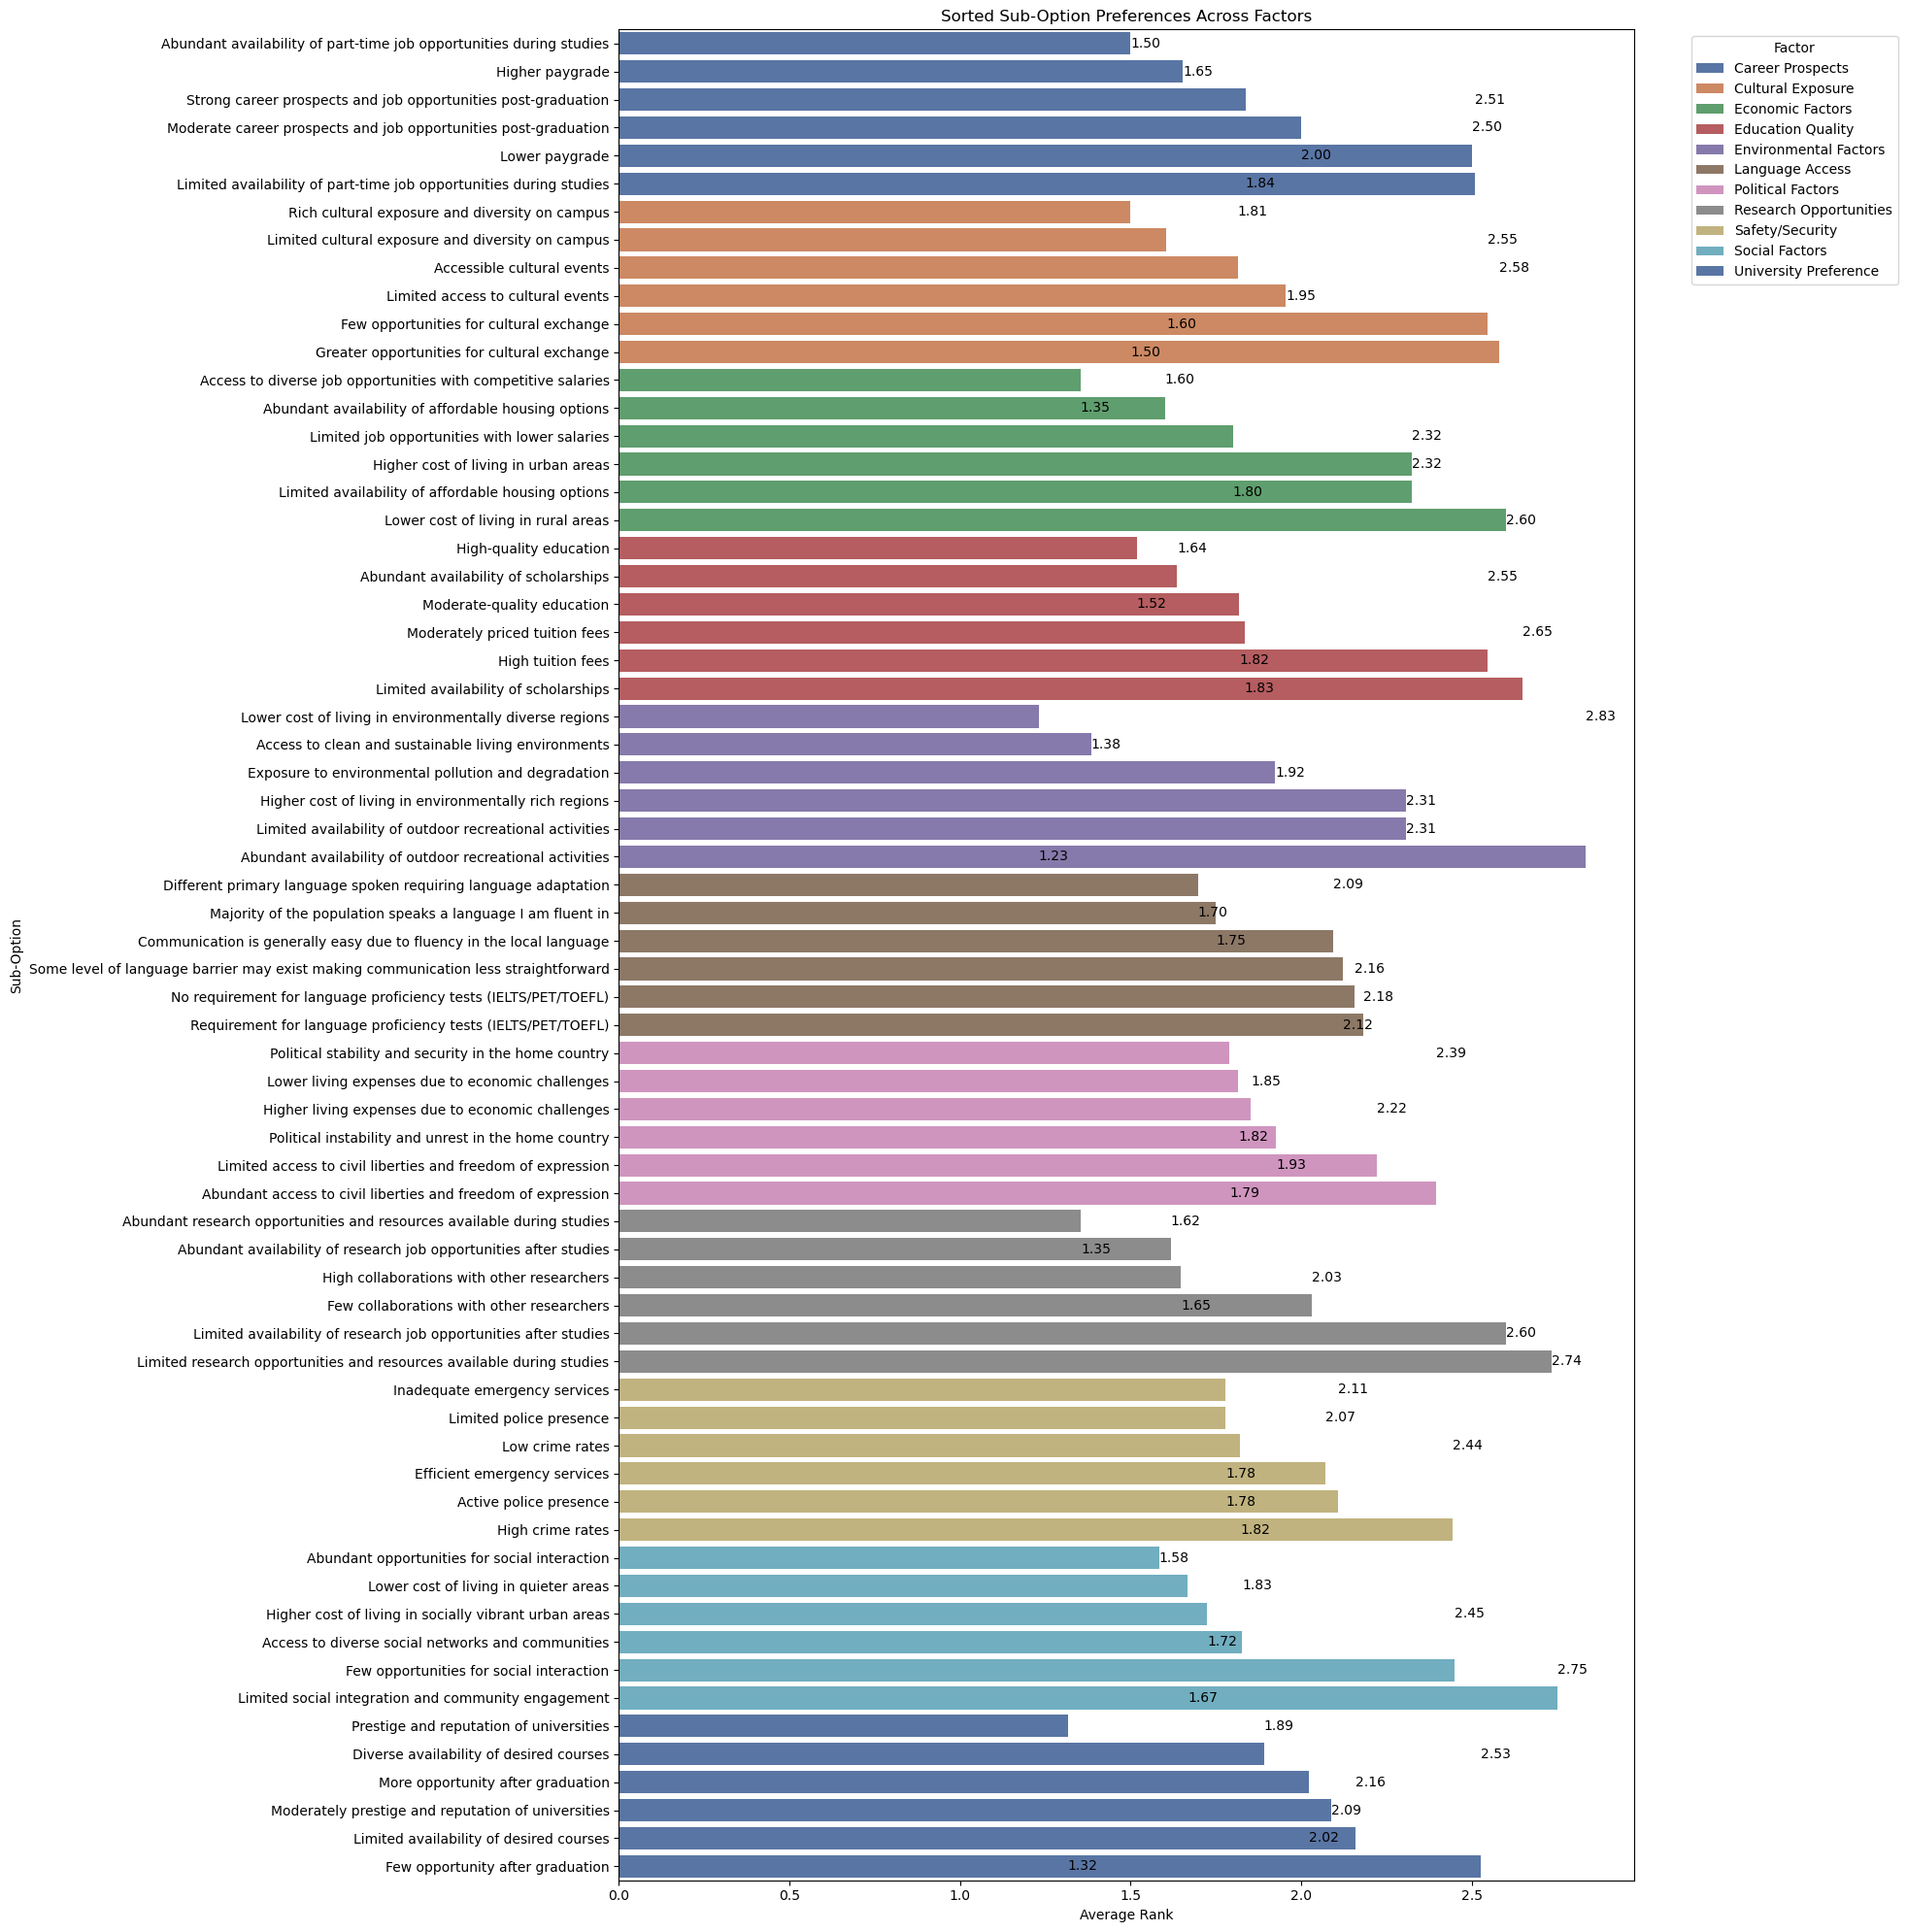

In [51]:
# Group by Choice_Set_ID and Sub_Option, then calculate the mean rank
sub_option_preference = df_abroad.groupby(['Choice_Set_ID', 'Sub_Option'])['Rank'].mean().reset_index()

# Sort by Choice_Set_ID and then by Rank (ascending)
sub_option_preference = sub_option_preference.sort_values(by=['Choice_Set_ID', 'Rank'])

# Now, sort the graph by the Rank within each Choice_Set_ID
# To do this, create a custom order for the Sub_Option based on the sorted rank
sub_option_preference['Sub_Option'] = pd.Categorical(
    sub_option_preference['Sub_Option'],
    categories=sub_option_preference.sort_values(['Choice_Set_ID', 'Rank'])['Sub_Option'],
    ordered=True
)

# Plot the results
plt.figure(figsize=(20, 20))
ax = sns.barplot(data=sub_option_preference, y='Sub_Option', x='Rank', hue='Choice_Set_ID', dodge=False, palette='deep')

# Add rank values on bars
for index, row in sub_option_preference.iterrows():
    ax.text(row['Rank'], index, f'{row["Rank"]:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.xlabel('Average Rank')
plt.ylabel('Sub-Option')
plt.title('Sorted Sub-Option Preferences Across Factors')
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

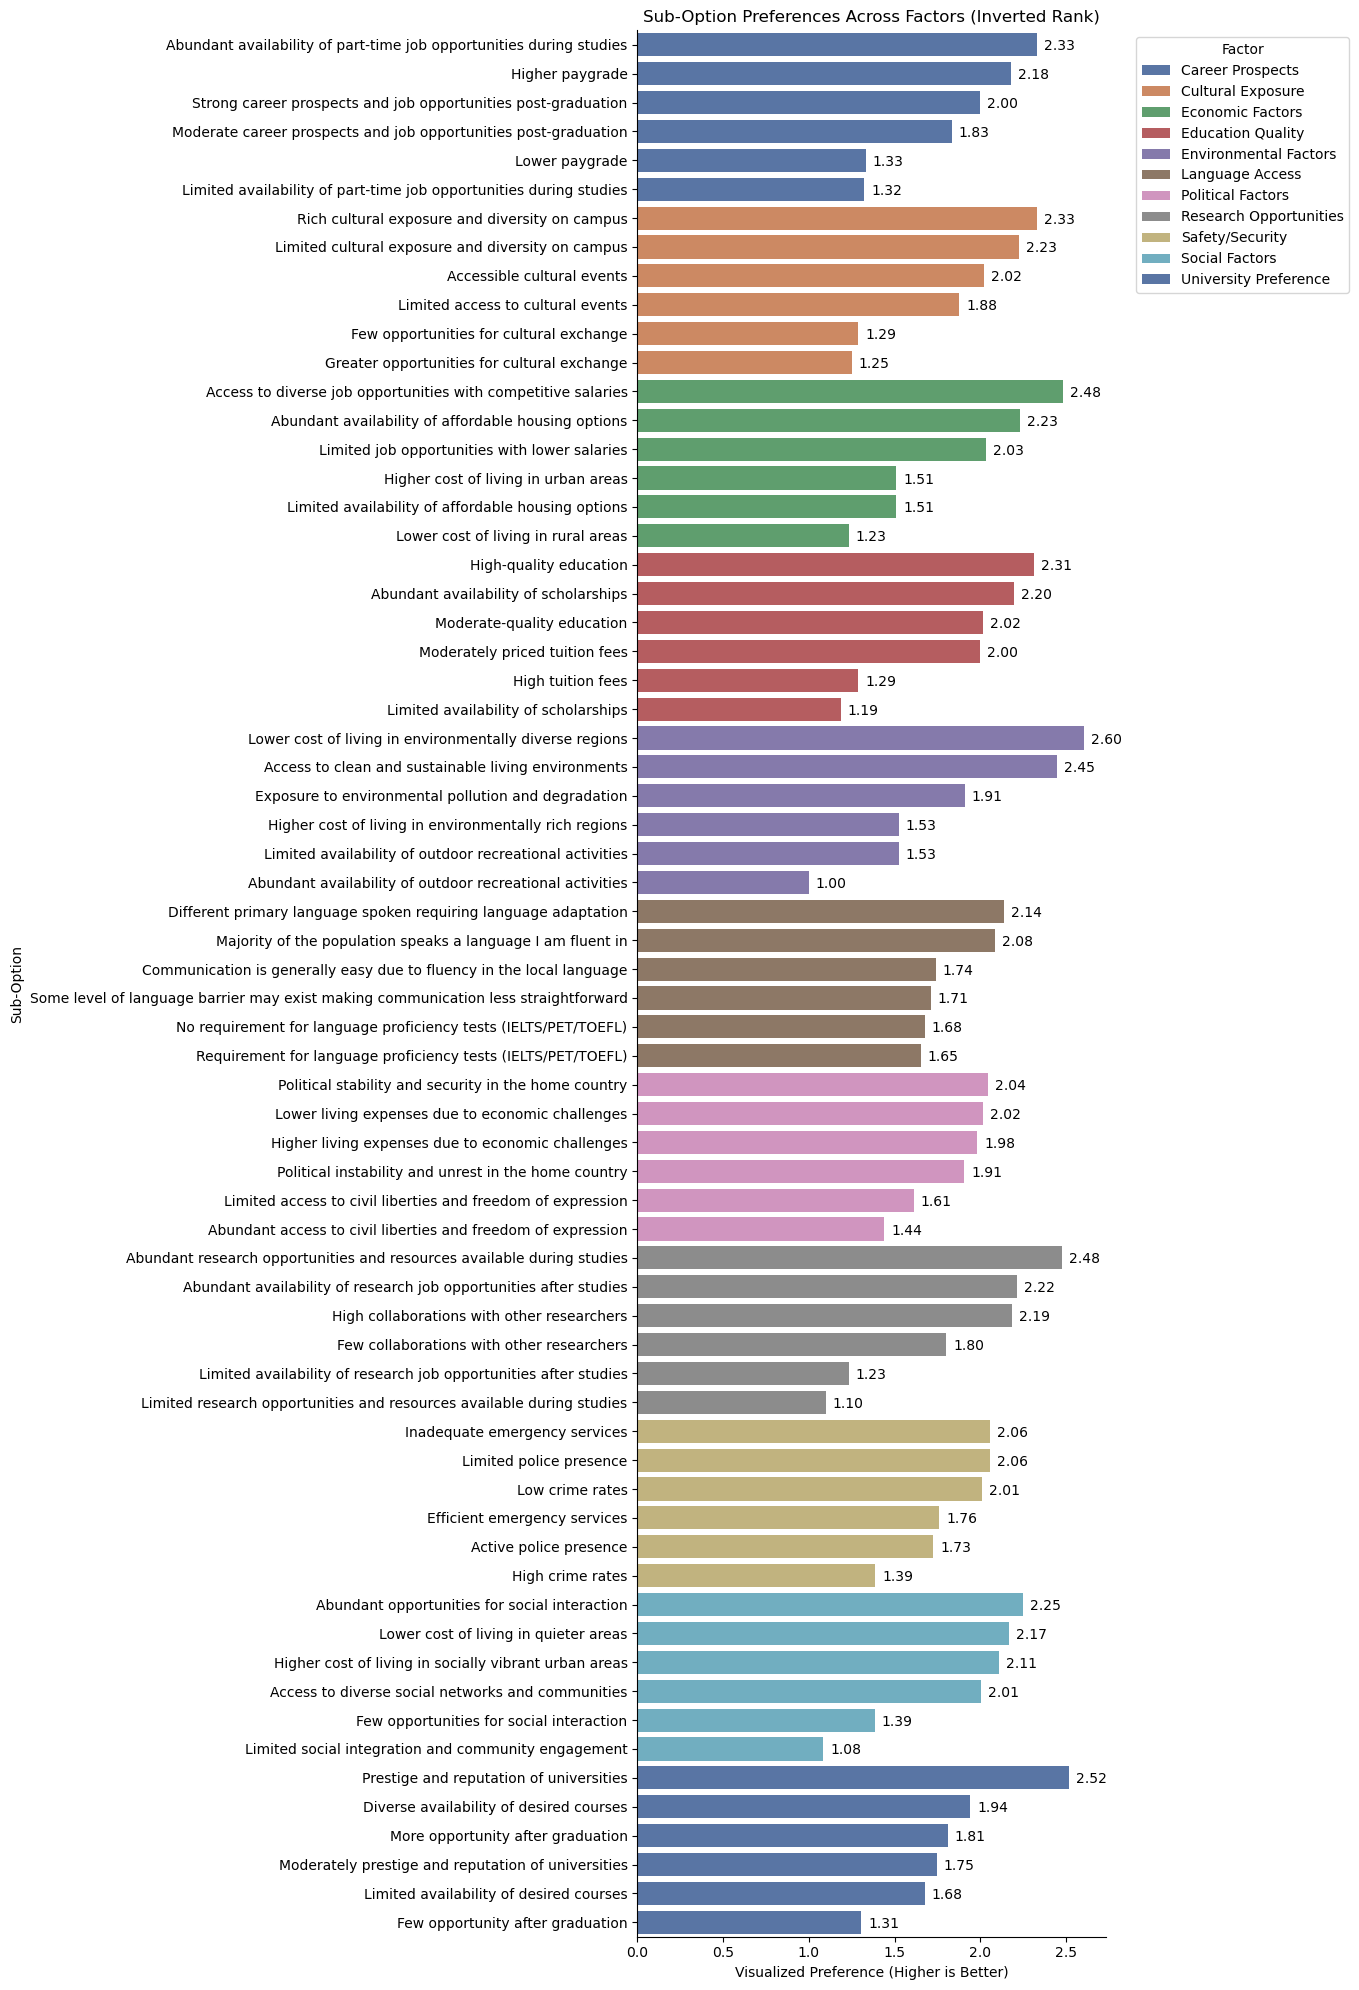

In [59]:
# Invert the rank values for better visual interpretation
max_rank = sub_option_preference['Rank'].max()
sub_option_preference['Inverted Rank'] = max_rank + 1 - sub_option_preference['Rank']

# Plot the results
plt.figure(figsize=(14, 20))
ax = sns.barplot(data=sub_option_preference, y='Sub_Option', x='Inverted Rank', hue='Choice_Set_ID', dodge=False, palette='deep')

# Add rank values just above the bar ends
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'left', va = 'center_baseline', 
                xytext = (5, 0), 
                textcoords = 'offset points',
                fontsize=10, color='black')

# Customize plot labels and title
plt.xlabel('Visualized Preference (Higher is Better)')
plt.ylabel('Sub-Option')
plt.title('Sub-Option Preferences Across Factors (Inverted Rank)')
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig("Preferences of subfactors.png")

# Show the plot
plt.show()